# COVID DATA VISUALISATIONS

The question we are trying to answer with this session is:
1. Did the effects of COVID restrictions result in more Credit Card Fraud than different periods of time throughout the year?

Datasets at our disposition:
- Simulated transaction dataset: time coverage 01/01/2019-06/21/2021 -daily records
- COVID API dataset: 02/02/2020-present day -daily records

How we want to answer this:
* We will first **analyse the trend of stringency actual values of COVID in USA over 2020 & 2021**: **Figure 1** 
    - **The distribution of stringency actual values of COVID in USA in 2020 & 2021**: **Figure 2**
* Then we will compare the percentage change of fraudulent transactions in the different states, to the percentage change of covid stringency values over the time period of 2020. (**Figures 3 & 4**)

## <u>Stage 1 : data cleansing and preparation</u>

After importing the libraries we need, we import the 2 datasets

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
from datetime import datetime 
import pprint as pp

### <u>Importing datasets</u>

#### Dataset 1: SIMULATED TRANSACTIONS DATASET

<div class="alert alert-block alert-info">
A dataset of simulated transaction data of legitimate and fraudulent transactions, focused on the most essential features of a transaction. 
</div>

The main features that summarise a transaction therefore are:

1. The transaction ID: A unique identifier for the transaction
2. The date and time: Date and time at which the transaction occurs
3. The customer ID: The identifier for the customer. Each customer has a unique identifier
4. The terminal ID: The identifier for the merchant (or more precisely the terminal). Each terminal has a unique identifier
5. The transaction amount: The amount of the transaction.
6. The fraud label: A binary variable, with the value $0$ for a legitimate transaction, or the value $1$ for a fraudulent transaction.

In [2]:
transactions_df = pd.read_csv('data/Full_transaction_dataset.csv')
transactions_df['trans_date_trans_time'] = pd.to_datetime(transactions_df['trans_date_trans_time'])
transactions_df.head(3)

,Unnamed: 0.1,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


#### Dataset 2: COVID19 2020/01/22-2020/12/31 & COVID19 2021/01/01-2021/12-31 stringency values. 

<div class="alert alert-block alert-info">
A dataset with various stringency calculation values, countries, date, deaths and confirmed values.
</div>

Please refer the the interpretation of stringency calculation values in the COVID API notebook.

What is relevant for us is the stringency_actual values.  
**Please note**: COVID data for USA only started being recorded from 2020-02-02 

'date_value' column has been changed from an object data type to datetime.

In [3]:
covid2020_data = pd.read_csv('data/COVID19API_2019-01-01_2020-12-31.csv')
covid2020_data['date_value'] = pd.to_datetime(covid2020_data['date_value'])
covid2020_data.head(3)

,date_value,country_code,confirmed,deaths,stringency_actual,stringency,stringency_legacy,stringency_legacy_disp
0,2020-01-22,GHA,0,0,0.0,0.0,0.0,0.0
1,2020-01-22,GIN,0,0,0.0,0.0,0.0,0.0
2,2020-01-22,GMB,0,0,0.0,0.0,0.0,0.0


In [4]:
#covid2021
covid2021_data = pd.read_csv('data/COVID19API_2021-01-01_2021-12-31.csv')
covid2021_data['date_value'] = pd.to_datetime(covid2021_data['date_value'])
covid2021_data.head(3)

,date_value,country_code,confirmed,deaths,stringency_actual,stringency,stringency_legacy,stringency_legacy_disp
0,2021-01-01,NLD,813765,11529,78.70,78.70,86.90,86.90
1,2021-01-01,SYR,11526,717,39.35,39.35,50.00,50.00
2,2021-01-01,ZWE,14084,369,69.44,69.44,73.81,73.81


### <u>Data preparation</u>

##### a. The Covid Dataset:

For **Figure 1** & **Figure 2** we are aiming to retrieve stringency_actual values only for USA in 2020 and 2021. 

To begin the exploration of the dataset it is always good to see what data types are in your dataset.

In [5]:
covid2020_data.dtypes

date_value                datetime64[ns]
country_code                      object
confirmed                          int64
deaths                             int64
stringency_actual                float64
stringency                       float64
stringency_legacy                float64
stringency_legacy_disp           float64
dtype: object

In [6]:
covid2021_data.dtypes

date_value                datetime64[ns]
country_code                      object
confirmed                         object
deaths                            object
stringency_actual                float64
stringency                       float64
stringency_legacy                float64
stringency_legacy_disp           float64
dtype: object

Then a quick look to see how many rows and how many columns

In [7]:
covid2020_data.shape

(63480, 8)

In [8]:
covid2021_data.shape
#can see here there are more rows due to the data actually starting from the beginning of the year.

(67525, 8)

### Getting only USA values

And also values where the stringency was not 0. As the earliest recorded data dates were from 2020-01-22. In the documentation it had stated values which were not none were replaced with NULL values. Checking to see whether USA had any Null values is vital for the analysis.

In [9]:
USACovid2020_df = covid2020_data.loc[(covid2020_data['country_code'] == 'USA') & (covid2020_data['stringency_actual'] != 0)]
USACovid2020_df.shape

(334, 8)

In [10]:
USACovid2020_df.isnull().sum()

date_value                0
country_code              0
confirmed                 0
deaths                    0
stringency_actual         0
stringency                0
stringency_legacy         0
stringency_legacy_disp    0
dtype: int64

In [11]:
#for 2021 dataset as all dates should have a stringency_actual value the number of rows should be 365
USACovid2021_df = covid2021_data.loc[(covid2021_data['country_code'] == 'USA') & (covid2021_data['stringency_actual'] != 0)]
USACovid2021_df.shape

(365, 8)

In [12]:
USACovid2021_df.isnull().sum()

date_value                0
country_code              0
confirmed                 0
deaths                    0
stringency_actual         0
stringency                0
stringency_legacy         0
stringency_legacy_disp    0
dtype: int64

### Saving this to a csv file should we need to use it at another time

In [13]:
USACovid2020_df.to_csv("data/COVIDUsa2020.csv", index=False)

In [14]:
USACovid2021_df.to_csv("data/COVIDUsa2021.csv", index=False)

In [15]:
"""again converting the dates with datetime. This might seem to be a bit tedious...
It needs to be done for 2021 also and then printing the dtypes so we know what they are"""

USACovid2020_data = pd.read_csv("data/COVIDUsa2020.csv")
USACovid2020_data['date_value'] = pd.to_datetime(USACovid2020_data['date_value'])
USACovid2020_data.dtypes

date_value                datetime64[ns]
country_code                      object
confirmed                          int64
deaths                             int64
stringency_actual                float64
stringency                       float64
stringency_legacy                float64
stringency_legacy_disp           float64
dtype: object

In [16]:
USACovid2021_data = pd.read_csv("data/COVIDUsa2021.csv")
USACovid2021_data['date_value'] = pd.to_datetime(USACovid2021_data['date_value'])
USACovid2021_data.dtypes

date_value                datetime64[ns]
country_code                      object
confirmed                          int64
deaths                             int64
stringency_actual                float64
stringency                       float64
stringency_legacy                float64
stringency_legacy_disp           float64
dtype: object

### For a more streamlined approach to viewing the data

We have dropped the unnecessary columns within the dataset. 

In [17]:
#dropping the unnecessary columns
USACovid2020_data.drop(['confirmed', 'deaths', 'stringency', 'stringency_legacy', 'stringency_legacy_disp'], axis=1, inplace=True)
USACovid2021_data.drop(['confirmed', 'deaths', 'stringency', 'stringency_legacy', 'stringency_legacy_disp'], axis=1, inplace=True)

In [18]:
USACovid2020_data.head()
#This is the first time we realise that USA data only started being collected for 2020 from 2nd of Feb.

,date_value,country_code,stringency_actual
0,2020-02-02,USA,5.56
1,2020-02-03,USA,5.56
2,2020-02-04,USA,5.56
3,2020-02-05,USA,5.56
4,2020-02-06,USA,5.56


In [19]:
#checking data starts from 01-01-2021
USACovid2021_data.head()

,date_value,country_code,stringency_actual
0,2021-01-01,USA,71.76
1,2021-01-02,USA,71.76
2,2021-01-03,USA,71.76
3,2021-01-04,USA,71.76
4,2021-01-05,USA,71.76


In [20]:
#checking data ends on the right date
USACovid2020_data.tail()

,date_value,country_code,stringency_actual
329,2020-12-27,USA,71.76
330,2020-12-28,USA,71.76
331,2020-12-29,USA,71.76
332,2020-12-30,USA,71.76
333,2020-12-31,USA,71.76


### Grouping the datasets into months, so firstly need to separate the date value.

In [21]:
Year=[]
Month=[]
Month_Year=[]
Day_Month_Year=[]
Day=[]
Date=[]

for i in range(len(USACovid2020_data['date_value'])):
    Y=USACovid2020_data['date_value'].iloc[i].year
    M=USACovid2020_data['date_value'].iloc[i].month
    D=USACovid2020_data['date_value'].iloc[i].day
    M_Y=f'{M}-{Y}'
    D_M_Y=f'{D}-{M}-{Y}'
    Year.append(Y)
    Month.append(M)
    Month_Year.append(M_Y)
    Day_Month_Year.append(D_M_Y)
    Day.append(D)
    Date.append(USACovid2020_data['date_value'].iloc[i])

covidDate2020_df=pd.DataFrame([Date,Day,Month,Year,Day_Month_Year,Month_Year]).transpose()
covidDate2020_df.head()

,0,1,2,3,4,5
0,2020-02-02,2,2,2020,2-2-2020,2-2020
1,2020-02-03,3,2,2020,3-2-2020,2-2020
2,2020-02-04,4,2,2020,4-2-2020,2-2020
3,2020-02-05,5,2,2020,5-2-2020,2-2020
4,2020-02-06,6,2,2020,6-2-2020,2-2020


Renaming the columns for easy access, interpretation and readability.

In [22]:
covidDate2020_df.rename(columns={0: "date_value",1: "Day", 2:"Month", 3: "Year", 4: "Day-Month-Year", 5:"Month-Year"},inplace=True)
covidDate2020_df.head(3)

,date_value,Day,Month,Year,Day-Month-Year,Month-Year
0,2020-02-02,2,2,2020,2-2-2020,2-2020
1,2020-02-03,3,2,2020,3-2-2020,2-2020
2,2020-02-04,4,2,2020,4-2-2020,2-2020


Here we marry the USA Covid dataset with the date dataset.

In [23]:
USACovid2020_data=covidDate2020_df.set_index('date_value').join(USACovid2020_data.set_index('date_value'))
USACovid2020_data.head(3)

,Day,Month,Year,Day-Month-Year,Month-Year,country_code,stringency_actual
date_value,,,,,,,
2020-02-02,2,2,2020,2-2-2020,2-2020,USA,5.56
2020-02-03,3,2,2020,3-2-2020,2-2020,USA,5.56
2020-02-04,4,2,2020,4-2-2020,2-2020,USA,5.56


Resetting the index so you can use the 'date_value' column

In [24]:
USACovid2020_data.reset_index(inplace=True)
USACovid2020_data.head()

,date_value,Day,Month,Year,Day-Month-Year,Month-Year,country_code,stringency_actual
0,2020-02-02,2,2,2020,2-2-2020,2-2020,USA,5.56
1,2020-02-03,3,2,2020,3-2-2020,2-2020,USA,5.56
2,2020-02-04,4,2,2020,4-2-2020,2-2020,USA,5.56
3,2020-02-05,5,2,2020,5-2-2020,2-2020,USA,5.56
4,2020-02-06,6,2,2020,6-2-2020,2-2020,USA,5.56


For Figures 3 & 4 we would need the values to be grouped by their month and the stringency_actual values to be averaged so they can be used to calculate percentage change. The following two cells were placed here as part of the data preparation steps.

In [25]:
USACovid2020Monthly = USACovid2020_data[['Month', 'stringency_actual']].groupby(by='Month').mean()
USACovid2020Monthly

,stringency_actual
Month,
2,5.560000
3,45.774516
4,72.690000
5,72.690000
6,70.711333
7,68.263871
8,67.130000
9,64.197667
10,64.051613


In [26]:
#resetting the index so month column can be used.
USACovid2020Monthly.reset_index(inplace=True)
USACovid2020Monthly.head()

,Month,stringency_actual
0,2,5.560000
1,3,45.774516
2,4,72.690000
3,5,72.690000
4,6,70.711333


### Now the same for 2021.

In [27]:
Year=[]
Month=[]
Month_Year=[]
Day_Month_Year=[]
Day=[]
Date=[]

for i in range(len(USACovid2021_data['date_value'])):
    Y=USACovid2021_data['date_value'].iloc[i].year
    M=USACovid2021_data['date_value'].iloc[i].month
    D=USACovid2021_data['date_value'].iloc[i].day
    M_Y=f'{M}-{Y}'
    D_M_Y=f'{D}-{M}-{Y}'
    Year.append(Y)
    Month.append(M)
    Month_Year.append(M_Y)
    Day_Month_Year.append(D_M_Y)
    Day.append(D)
    Date.append(USACovid2021_data['date_value'].iloc[i])

covidDate2021_df=pd.DataFrame([Date,Day,Month,Year,Day_Month_Year,Month_Year]).transpose()
covidDate2021_df.head()

,0,1,2,3,4,5
0,2021-01-01,1,1,2021,1-1-2021,1-2021
1,2021-01-02,2,1,2021,2-1-2021,1-2021
2,2021-01-03,3,1,2021,3-1-2021,1-2021
3,2021-01-04,4,1,2021,4-1-2021,1-2021
4,2021-01-05,5,1,2021,5-1-2021,1-2021


In [28]:
covidDate2021_df.rename(columns={0: "date_value",1: "Day", 2:"Month", 3: "Year", 4: "Day-Month-Year", 5:"Month-Year"},inplace=True)
covidDate2021_df.head(3)

,date_value,Day,Month,Year,Day-Month-Year,Month-Year
0,2021-01-01,1,1,2021,1-1-2021,1-2021
1,2021-01-02,2,1,2021,2-1-2021,1-2021
2,2021-01-03,3,1,2021,3-1-2021,1-2021


In [29]:
USACovid2021_data=covidDate2021_df.set_index('date_value').join(USACovid2021_data.set_index('date_value'))
USACovid2021_data.head(3)

,Day,Month,Year,Day-Month-Year,Month-Year,country_code,stringency_actual
date_value,,,,,,,
2021-01-01,1,1,2021,1-1-2021,1-2021,USA,71.76
2021-01-02,2,1,2021,2-1-2021,1-2021,USA,71.76
2021-01-03,3,1,2021,3-1-2021,1-2021,USA,71.76


In [30]:
USACovid2021_data.reset_index(inplace=True)
USACovid2021_data.head()

,date_value,Day,Month,Year,Day-Month-Year,Month-Year,country_code,stringency_actual
0,2021-01-01,1,1,2021,1-1-2021,1-2021,USA,71.76
1,2021-01-02,2,1,2021,2-1-2021,1-2021,USA,71.76
2,2021-01-03,3,1,2021,3-1-2021,1-2021,USA,71.76
3,2021-01-04,4,1,2021,4-1-2021,1-2021,USA,71.76
4,2021-01-05,5,1,2021,5-1-2021,1-2021,USA,71.76


In [31]:
USACovid2021Monthly = USACovid2021_data[['Month', 'stringency_actual']].groupby(by='Month').mean()
USACovid2021Monthly

,stringency_actual
Month,
1,71.760000
2,68.324286
3,63.573548
4,56.940000
5,51.893548
6,55.152333
7,52.256452
8,54.258065
9,54.536000


In [32]:
USACovid2021Monthly.reset_index(inplace=True)
USACovid2021Monthly.head()

,Month,stringency_actual
0,1,71.760000
1,2,68.324286
2,3,63.573548
3,4,56.940000
4,5,51.893548


### To get some information about the actual data for USA

This will help understand the visualisation that would show stringency level

In [33]:
USACovid2020_data.describe()

,stringency_actual
count,334.000000
mean,61.544850
std,20.076686
min,5.560000
25%,62.500000
50%,68.055000
75%,72.690000
max,75.460000


In [34]:
USACovid2021_data.describe()

,stringency_actual
count,365.000000
mean,57.723014
std,7.094231
min,46.760000
25%,52.310000
50%,56.020000
75%,61.570000
max,71.760000


## <u>Stage 2 : data visualisation</u>

## Analysis of the trend of stringency actual values of COVID in USA over 2020 & 2021 
## (Figures 1 & 2)

Before we start the comparison between stringency percentage change for USA during COVID v. fraudulent transactions percentage change in 2019 & 2020. We found it important to have an understanding of how the stringency values did change over the course of 2020 and 2021 in the USA. 
These 2 figures endeavour to provide some insight from the data we have to give us an understanding of what the USA government policies were like. 
We have used the stringency_actual values as opposed to the other calculated ones as we do not know all the initial values for which they were used for the calculations. 

We have to remember that we can draw conclusions to the best of our abilities with the data provided and collected for us. 
The source is a trusted one and we believe this dataset has minimialised as much bias as possible.

Therefore we have decided this is the best method for us to have a clearer idea of what the data is trying to tell us. 

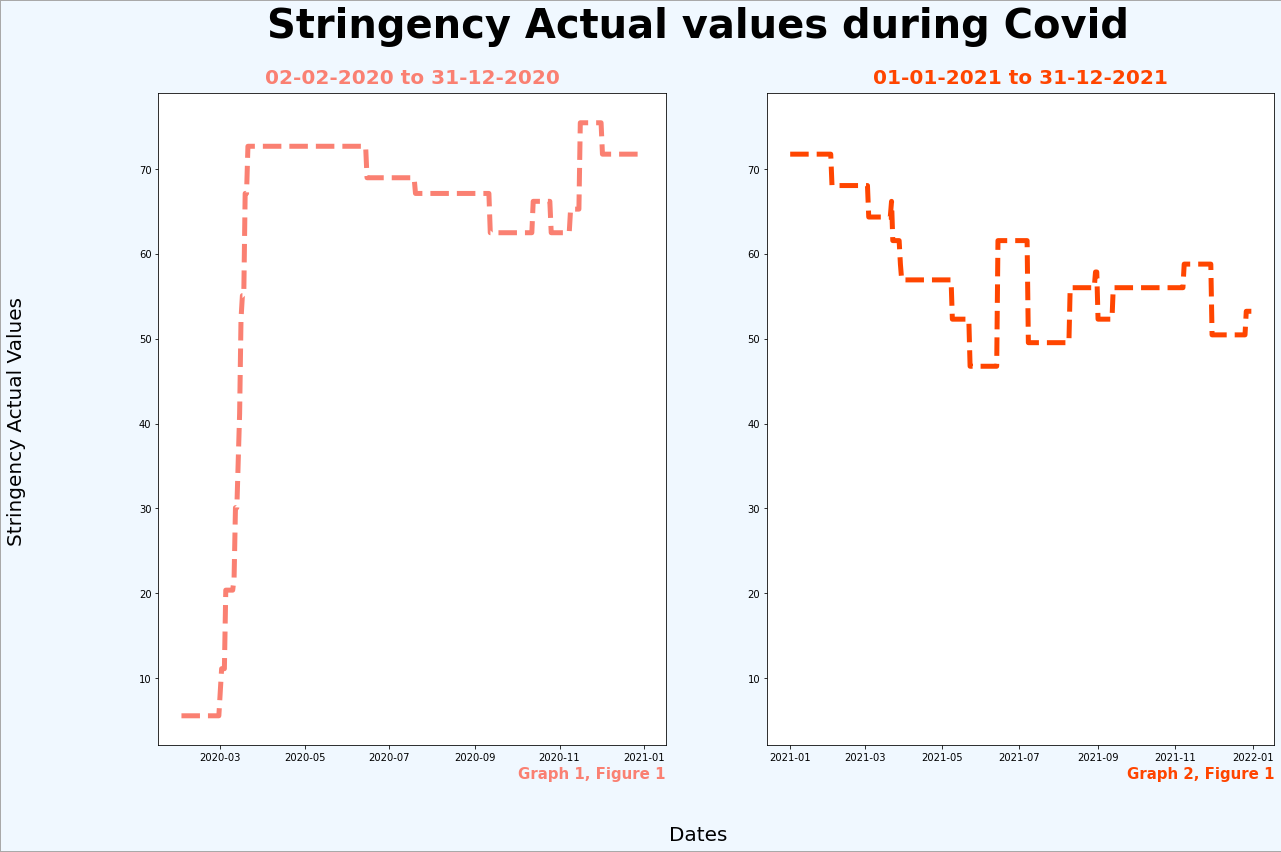

In [35]:
#setting the x axis values
Covid2020Dates = USACovid2020_data['date_value']
Covid2021Dates = USACovid2021_data['date_value']

#setting the y axis values - for figure 2 they become the x axis values
stringencyValue2020 = USACovid2020_data['stringency_actual']
stringencyValue2021 = USACovid2021_data['stringency_actual']

#setting up the figure and labels
fig_covid_stringency_time = plt.figure(figsize= [20, 12], facecolor = 'aliceblue', edgecolor = 'darkgray', linewidth = 2 ) 
fig_covid_stringency_time.suptitle('Stringency Actual values during Covid', fontsize = 40, fontweight = 'bold')
fig_covid_stringency_time.supxlabel('Dates', fontsize = 20)
fig_covid_stringency_time.supylabel('Stringency Actual Values', fontsize = 20)

#graphing subplot 1 - 2020
graph1 = plt.subplot(121)
plt.plot(Covid2020Dates, stringencyValue2020, linestyle = 'dashed', linewidth = 5, color = 'salmon')
plt.title('02-02-2020 to 31-12-2020', fontsize = 20, pad = 10, fontweight = 'bold', color = 'salmon')
plt.xlabel('Graph 1, Figure 1', fontsize = 15, fontweight = 'bold', color = 'salmon', loc= 'right')

#graphing subplot 2 - 2021
graph2 = plt.subplot(122, sharey=graph1)
plt.plot(Covid2021Dates, stringencyValue2021, linestyle = 'dashed', linewidth = 5, color = 'orangered')
plt.title('01-01-2021 to 31-12-2021', fontsize = 20, pad = 10, fontweight = 'bold', color = 'orangered')
plt.xlabel('Graph 2, Figure 1', fontsize = 15, fontweight = 'bold', color = 'orangered', loc = 'right')

plt.show()

In Figure 1, the sharp rise in stringency values in 2020-03 indicates when COVID19 first impacted the USA government's policies. From these we are able to see the dips and rises according to what you can infer as seasonal changes. There is a slight increase of stringency in 2020-11 at the beginning of winter, then as winter draws to an end the stringency values slowly decrease. This is not to say they are gone completely. With COVID19 there was a lot of uncertainty and even though Summer came around 2021-05/06 with stringency being at the lowest levels for the past year, it sharply increased back to 63 possibly due to the increase in number of COVID19 cases.

### Distribution of stringency values 2020 v 2021 - Figure 2

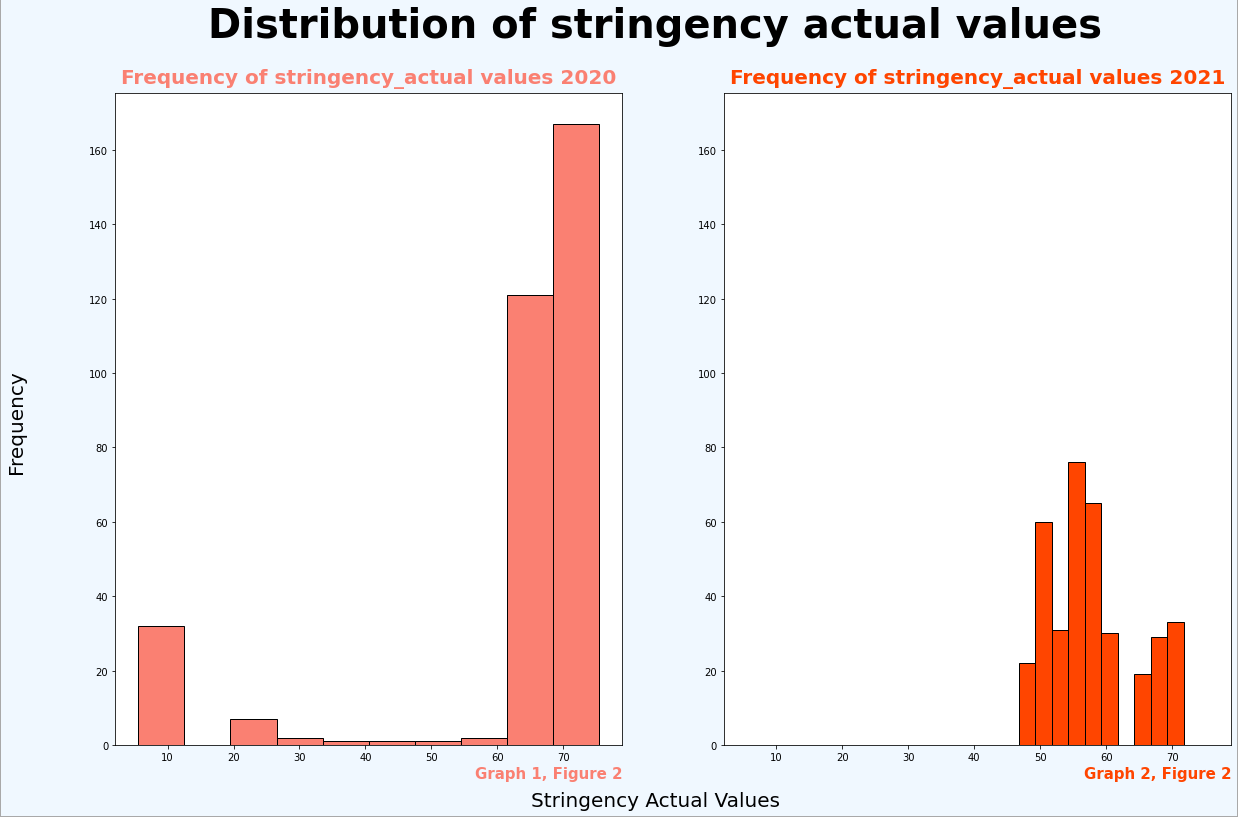

In [36]:
#setting the figure configurations
fig_covid_stringency_freq = plt.figure(figsize= [20, 12], facecolor = 'aliceblue', edgecolor = 'darkgray', linewidth = 2) 
fig_covid_stringency_freq.suptitle('Distribution of stringency actual values', fontsize = 40, fontweight = 'bold')
fig_covid_stringency_freq.supxlabel('Stringency Actual Values', fontsize = 20, y = 0.05)
fig_covid_stringency_freq.supylabel('Frequency', fontsize = 20, x= 0.05)

#graphing subplot 1 - 2020
graph3 = plt.subplot(121)
plt.hist(stringencyValue2020, facecolor = 'salmon', edgecolor = 'black')
plt.title('Frequency of stringency_actual values 2020', fontsize = 20, pad = 10, fontweight = 'bold', color = 'salmon')
plt.xlabel('Graph 1, Figure 2', fontsize = 15, fontweight = 'bold', color= 'salmon', loc = 'right')

#graphing subplot 2 - 2021
p4 = plt.subplot(122, sharex=graph3, sharey=graph3)
plt.hist(stringencyValue2021, facecolor = 'orangered', edgecolor = 'black')
plt.title('Frequency of stringency_actual values 2021', fontsize = 20, pad = 10, fontweight = 'bold', color = 'orangered')
plt.xlabel('Graph 2, Figure 2', fontsize = 15, fontweight = 'bold', color= 'orangered', loc = 'right')

plt.show()

In Figure 2 we compare the distribution of stringency actual values between 2020 and 2021. This is to see how the USA changed their stringency as we got to understand COVID19 better. They share the same x and y axes so you can see the difference in values immediately. 
With these graphs it is clear to see that consistently higher levels of stringency were present for the year of 2021. There is a spike for the year 2020 but there was more uncertainty and so that is why there are values towards the lower end of the spectrum. 

# Covid v Transactions Visualisations

### Retrieving the data for transactions

As we have already retrieved the dataset at the beginning of the notebook. It's now time to explore it.

In [37]:
transactions_df.dtypes

Unnamed: 0.1                      int64
Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

In [38]:
#finding out some more information so we can manipulate. Keys are shown in dtypes but to ensure we do not miss out on any.
display(transactions_df.shape)
display(transactions_df.keys())

(1852394, 24)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'trans_date_trans_time', 'cc_num',
       'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [39]:
#dropping the columns we do not need and showing the first 5 rows
transactions_df.drop(['cc_num', 'merchant','category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'unix_time', 'merch_lat', 'merch_long'], axis = 1, inplace = True)
transactions_df.head()

,Unnamed: 0.1,Unnamed: 0,trans_date_trans_time,trans_num,is_fraud
0,0,0,2019-01-01 00:00:18,0b242abb623afc578575680df30655b9,0
1,1,1,2019-01-01 00:00:44,1f76529f8574734946361c461b024d99,0
2,2,2,2019-01-01 00:00:51,a1a22d70485983eac12b5b88dad1cf95,0
3,3,3,2019-01-01 00:01:16,6b849c168bdad6f867558c3793159a81,0
4,4,4,2019-01-01 00:03:06,a41d7549acf90789359a9aa5346dcb46,0


In [40]:
#realising I had not dropped the unnamed columns (previous indexes)
transactions_df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1, inplace = True)
transactions_df.head()

,trans_date_trans_time,trans_num,is_fraud
0,2019-01-01 00:00:18,0b242abb623afc578575680df30655b9,0
1,2019-01-01 00:00:44,1f76529f8574734946361c461b024d99,0
2,2019-01-01 00:00:51,a1a22d70485983eac12b5b88dad1cf95,0
3,2019-01-01 00:01:16,6b849c168bdad6f867558c3793159a81,0
4,2019-01-01 00:03:06,a41d7549acf90789359a9aa5346dcb46,0


In [41]:
#Now time to filter the transactions by year. As the transactions are conducted by the second, the date works out quite well
transactions2020_df = transactions_df.loc[(transactions_df['trans_date_trans_time'] >= '2020-01-01')]
display(transactions2020_df.shape)
display(transactions2020_df.head(3))
display(transactions2020_df.tail(3))

(927544, 3)

,trans_date_trans_time,trans_num,is_fraud
924850,2020-01-01 00:00:57,59e089f4b553f5d7ce7a37235dd40a98,0
924851,2020-01-01 00:01:28,ab426adf393f1d668b70d2a7d5a14093,0
924852,2020-01-01 00:04:56,91de69a34cf6439c10c9d7d32c94c0a3,0


,trans_date_trans_time,trans_num,is_fraud
1852391,2020-12-31 23:59:15,6c5b7c8add471975aa0fec023b2e8408,0
1852392,2020-12-31 23:59:24,14392d723bb7737606b2700ac791b7aa,0
1852393,2020-12-31 23:59:34,1765bb45b3aa3224b4cdcb6e7a96cee3,0


In [42]:
#same for transactions in 2019
transactions2019_df = transactions_df.loc[(transactions_df['trans_date_trans_time'] < '2020-01-01')]
display(transactions2019_df.shape)
display(transactions2019_df.head(3))
display(transactions2019_df.tail(3))

(924850, 3)

,trans_date_trans_time,trans_num,is_fraud
0,2019-01-01 00:00:18,0b242abb623afc578575680df30655b9,0
1,2019-01-01 00:00:44,1f76529f8574734946361c461b024d99,0
2,2019-01-01 00:00:51,a1a22d70485983eac12b5b88dad1cf95,0


,trans_date_trans_time,trans_num,is_fraud
924847,2019-12-31 23:58:40,73224320e790710d525cb23626f5780d,0
924848,2019-12-31 23:59:23,7dd9c72c87b56c015c4488126cf10fec,1
924849,2019-12-31 23:59:53,9ce37d068e01ff4e97e01bb1cc6dac4f,0


### Now for only fraudulent transactions in 2019

As we are only interested in fraudulent transactions for 2019 we need to filter that out too. We have done this in steps as the complete transactions dataset has a lot of data and so doing them in separate steps may help with the workload.

In [43]:
#we know legitimate transactions are classed with 0 and fraudulent is 1
fraudTrans2019_df = transactions2019_df.loc[(transactions2019_df['is_fraud'] == 1)]
#We want to reset the index since it's a new dataframe.
fraudTrans2019_df.reset_index(inplace=True)
display(fraudTrans2019_df.shape)
display(fraudTrans2019_df.dtypes)
display(fraudTrans2019_df.describe())
display(fraudTrans2019_df.head(3))

(5220, 4)

index                             int64
trans_date_trans_time    datetime64[ns]
trans_num                        object
is_fraud                          int64
dtype: object

,index,is_fraud
count,5220.000000,5220.0
mean,413492.444636,1.0
std,281377.555742,0.0
min,2449.000000,1.0
25%,138582.750000,1.0
50%,393005.500000,1.0
75%,665243.750000,1.0
max,924848.000000,1.0


,index,trans_date_trans_time,trans_num,is_fraud
0,2449,2019-01-02 01:06:37,e8a81877ae9a0a7f883e15cb39dc4022,1
1,2472,2019-01-02 01:47:29,bc7d41c41103877b03232f03f1f8d3f5,1
2,2523,2019-01-02 03:05:23,b98f12f4168391b2203238813df5aa8c,1


To plot the percentage of fraudulent transactions against the legitimate ones by year we need to extract the year from the columns 'Date'.

In [44]:
#setting variables to store them in temporarily
Year=[]
Month=[]
Month_Year=[]
Day_Month_Year=[]
Day=[]
Date=[]

#looping through the timestamps so we can separate them out
for i in range(len(fraudTrans2019_df['trans_date_trans_time'])):
    Y=fraudTrans2019_df['trans_date_trans_time'].iloc[i].year
    M=fraudTrans2019_df['trans_date_trans_time'].iloc[i].month
    D=fraudTrans2019_df['trans_date_trans_time'].iloc[i].day
    M_Y=f'{M}-{Y}'
    D_M_Y=f'{D}-{M}-{Y}'
    Year.append(Y)
    Month.append(M)
    Month_Year.append(M_Y)
    Day_Month_Year.append(D_M_Y)
    Day.append(D)
    Date.append(fraudTrans2019_df['trans_date_trans_time'].iloc[i])

#saving it to a new DF to use
Date2019_df=pd.DataFrame([Date,Day,Month,Year,Day_Month_Year,Month_Year]).transpose()
Date2019_df.head()

,0,1,2,3,4,5
0,2019-01-02 01:06:37,2,1,2019,2-1-2019,1-2019
1,2019-01-02 01:47:29,2,1,2019,2-1-2019,1-2019
2,2019-01-02 03:05:23,2,1,2019,2-1-2019,1-2019
3,2019-01-02 03:38:03,2,1,2019,2-1-2019,1-2019
4,2019-01-02 03:55:47,2,1,2019,2-1-2019,1-2019


In [45]:
#renaming columns for ease of use
Date2019_df.rename(columns={0: "trans_date_trans_time",1: "Day", 2:"Month", 3: "Year", 4: "Day-Month-Year", 5:"Month-Year"},inplace=True)
Date2019_df.head(3)

,trans_date_trans_time,Day,Month,Year,Day-Month-Year,Month-Year
0,2019-01-02 01:06:37,2,1,2019,2-1-2019,1-2019
1,2019-01-02 01:47:29,2,1,2019,2-1-2019,1-2019
2,2019-01-02 03:05:23,2,1,2019,2-1-2019,1-2019


In [46]:
#joining the two DF so we can separate the transactions by day or month or year.
fraudTrans2019_df=Date2019_df.set_index('trans_date_trans_time').join(fraudTrans2019_df.set_index('trans_date_trans_time'))
fraudTrans2019_df.head(3)

,Day,Month,Year,Day-Month-Year,Month-Year,index,trans_num,is_fraud
trans_date_trans_time,,,,,,,,
2019-01-02 01:06:37,2,1,2019,2-1-2019,1-2019,2449,e8a81877ae9a0a7f883e15cb39dc4022,1
2019-01-02 01:47:29,2,1,2019,2-1-2019,1-2019,2472,bc7d41c41103877b03232f03f1f8d3f5,1
2019-01-02 03:05:23,2,1,2019,2-1-2019,1-2019,2523,b98f12f4168391b2203238813df5aa8c,1


In [47]:
#Again we reset the index to be able to use the trans_date_trans_time column
fraudTrans2019_df.reset_index(inplace=True)

In [48]:
#Then to drop the previous index column which we no longer need
fraudTrans2019_df.drop(['index'], axis=1, inplace=True)
fraudTrans2019_df.head(3)

,trans_date_trans_time,Day,Month,Year,Day-Month-Year,Month-Year,trans_num,is_fraud
0,2019-01-02 01:06:37,2,1,2019,2-1-2019,1-2019,e8a81877ae9a0a7f883e15cb39dc4022,1
1,2019-01-02 01:47:29,2,1,2019,2-1-2019,1-2019,bc7d41c41103877b03232f03f1f8d3f5,1
2,2019-01-02 03:05:23,2,1,2019,2-1-2019,1-2019,b98f12f4168391b2203238813df5aa8c,1


In [49]:
#Filtering and creating a new df with only the months and the count of fraud per month
fraudTrans2019Monthly = fraudTrans2019_df[['Month', 'is_fraud']].groupby(by='Month').count()
fraudTrans2019Monthly.head()

,is_fraud
Month,
1,506
2,519
3,494
4,376
5,408


### Now for only fraudulent transactions in 2020

In [50]:
fraudTrans2020_df = transactions2020_df.loc[(transactions2020_df['is_fraud'] == 1)]
fraudTrans2020_df.reset_index(inplace=True)
display(fraudTrans2020_df.shape)
display(fraudTrans2020_df.dtypes)
display(fraudTrans2020_df.describe())
display(fraudTrans2020_df.head(3))

(4431, 4)

index                             int64
trans_date_trans_time    datetime64[ns]
trans_num                        object
is_fraud                          int64
dtype: object

,index,is_fraud
count,4.431000e+03,4431.0
mean,1.316412e+06,1.0
std,2.479684e+05,0.0
min,9.250070e+05,1.0
25%,1.097432e+06,1.0
50%,1.290371e+06,1.0
75%,1.537382e+06,1.0
max,1.814246e+06,1.0


,index,trans_date_trans_time,trans_num,is_fraud
0,925007,2020-01-01 03:56:59,da2b563e50a1efd7e9e5b517bad69a18,1
1,926054,2020-01-01 22:36:51,09eaa5ad09ca0c4836ec2596095ad9cc,1
2,926077,2020-01-01 23:02:47,d1781a00e70fdd858e432f290d5ee195,1


To plot the percentage change of fraudulent transactions against the percentage change of stringency_actual we need to extract the day from the columns 'trans_date_trans_time'.

In [51]:
Year=[]
Month=[]
Month_Year=[]
Day_Month_Year=[]
Day=[]
Date=[]

for i in range(len(fraudTrans2020_df['trans_date_trans_time'])):
    Y=fraudTrans2020_df['trans_date_trans_time'].iloc[i].year
    M=fraudTrans2020_df['trans_date_trans_time'].iloc[i].month
    D=fraudTrans2020_df['trans_date_trans_time'].iloc[i].day
    M_Y=f'{M}-{Y}'
    D_M_Y=f'{D}-{M}-{Y}'
    Year.append(Y)
    Month.append(M)
    Month_Year.append(M_Y)
    Day_Month_Year.append(D_M_Y)
    Day.append(D)
    Date.append(fraudTrans2020_df['trans_date_trans_time'].iloc[i])

Date2020_df=pd.DataFrame([Date,Day,Month,Year,Day_Month_Year,Month_Year]).transpose()
Date2020_df.head()

,0,1,2,3,4,5
0,2020-01-01 03:56:59,1,1,2020,1-1-2020,1-2020
1,2020-01-01 22:36:51,1,1,2020,1-1-2020,1-2020
2,2020-01-01 23:02:47,1,1,2020,1-1-2020,1-2020
3,2020-01-02 01:26:24,2,1,2020,2-1-2020,1-2020
4,2020-01-02 01:47:46,2,1,2020,2-1-2020,1-2020


In [52]:
Date2020_df.rename(columns={0: "trans_date_trans_time",1: "Day", 2:"Month", 3: "Year", 4: "Day-Month-Year", 5:"Month-Year"},inplace=True)
Date2020_df.head(3)

,trans_date_trans_time,Day,Month,Year,Day-Month-Year,Month-Year
0,2020-01-01 03:56:59,1,1,2020,1-1-2020,1-2020
1,2020-01-01 22:36:51,1,1,2020,1-1-2020,1-2020
2,2020-01-01 23:02:47,1,1,2020,1-1-2020,1-2020


In [53]:
fraudTrans2020_df=Date2020_df.set_index('trans_date_trans_time').join(fraudTrans2020_df.set_index('trans_date_trans_time'))
fraudTrans2020_df.head(3)

,Day,Month,Year,Day-Month-Year,Month-Year,index,trans_num,is_fraud
trans_date_trans_time,,,,,,,,
2020-01-01 03:56:59,1,1,2020,1-1-2020,1-2020,925007,da2b563e50a1efd7e9e5b517bad69a18,1
2020-01-01 22:36:51,1,1,2020,1-1-2020,1-2020,926054,09eaa5ad09ca0c4836ec2596095ad9cc,1
2020-01-01 23:02:47,1,1,2020,1-1-2020,1-2020,926077,d1781a00e70fdd858e432f290d5ee195,1


In [54]:
fraudTrans2020_df.reset_index(inplace=True)
fraudTrans2020_df.head(3)

,trans_date_trans_time,Day,Month,Year,Day-Month-Year,Month-Year,index,trans_num,is_fraud
0,2020-01-01 03:56:59,1,1,2020,1-1-2020,1-2020,925007,da2b563e50a1efd7e9e5b517bad69a18,1
1,2020-01-01 22:36:51,1,1,2020,1-1-2020,1-2020,926054,09eaa5ad09ca0c4836ec2596095ad9cc,1
2,2020-01-01 23:02:47,1,1,2020,1-1-2020,1-2020,926077,d1781a00e70fdd858e432f290d5ee195,1


In [55]:
fraudTrans2020_df.drop(['index'], axis=1, inplace=True)
fraudTrans2020_df.head(3)

,trans_date_trans_time,Day,Month,Year,Day-Month-Year,Month-Year,trans_num,is_fraud
0,2020-01-01 03:56:59,1,1,2020,1-1-2020,1-2020,da2b563e50a1efd7e9e5b517bad69a18,1
1,2020-01-01 22:36:51,1,1,2020,1-1-2020,1-2020,09eaa5ad09ca0c4836ec2596095ad9cc,1
2,2020-01-01 23:02:47,1,1,2020,1-1-2020,1-2020,d1781a00e70fdd858e432f290d5ee195,1


In [56]:
fraudTrans2020Monthly = fraudTrans2020_df[['Month', 'is_fraud']].groupby(by='Month').count()
fraudTrans2020Monthly.head()

,is_fraud
Month,
1,343
2,338
3,444
4,302
5,529


## Let's make some comparisons

We would need to calculate the monthly percentage change for stringency values. <-- plot()/bar()
Then compare it with the percentage change of monthly counts of fraudulent transactions 2019 & another line/bar for 
fraudulent transactions 2020 <-- plot()/bar()

#### Calculating monthly percentage change for stringency values.

In [57]:
#Not entirely sure whether this is best practice, but thought it may be better to convert the index back to the 'month' column
#This is so we know that the comparison is done by the month as opposed to the index
USACovid2020Monthly = USACovid2020Monthly.set_index('Month')
USACovid2020Monthly.head(3)

,stringency_actual
Month,
2,5.560000
3,45.774516
4,72.690000


In [58]:
#calcuating the PCT Change
stringeActualPctChange = USACovid2020Monthly.pct_change()
stringeActualPctChange.head()

,stringency_actual
Month,
2,NaN
3,7.232827
4,0.588001
5,0.000000
6,-0.027221


In [59]:
#resetting index for future use
stringeActualPctChange.reset_index(inplace=True)
stringeActualPctChange.head()

,Month,stringency_actual
0,2,NaN
1,3,7.232827
2,4,0.588001
3,5,0.000000
4,6,-0.027221


Same again for 2021

In [60]:
USACovid2021Monthly = USACovid2021Monthly.set_index('Month')

In [61]:
stringeActualPctChange2021 = USACovid2021Monthly.pct_change()
stringeActualPctChange2021.head()

,stringency_actual
Month,
1,NaN
2,-0.047878
3,-0.069532
4,-0.104344
5,-0.088628


In [62]:
stringeActualPctChange2021.reset_index(inplace=True)
stringeActualPctChange2021.head()

,Month,stringency_actual
0,1,NaN
1,2,-0.047878
2,3,-0.069532
3,4,-0.104344
4,5,-0.088628


#### Calculating monthly percentage change for fraudulent transactions

In [63]:
#I had left the fraudTrans2020Monthly indexed with the 'Month' key
fraudTransPctChange2020 = fraudTrans2020Monthly.pct_change()
fraudTransPctChange2020.head()

,is_fraud
Month,
1,NaN
2,-0.014577
3,0.313609
4,-0.319820
5,0.751656


In [64]:
fraudTransPctChange2020.reset_index(inplace=True)
fraudTransPctChange2020.head()

,Month,is_fraud
0,1,NaN
1,2,-0.014577
2,3,0.313609
3,4,-0.319820
4,5,0.751656


In [65]:
#renaming the column for clearer interpretation
fraudTransPctChange2020.rename(columns={'is_fraud': "is_fraud_2020"},inplace=True)
fraudTransPctChange2020.head()

,Month,is_fraud_2020
0,1,NaN
1,2,-0.014577
2,3,0.313609
3,4,-0.319820
4,5,0.751656


Doing the same for 2019

In [66]:
fraudTransPctChange2019 = fraudTrans2019Monthly.pct_change()
fraudTransPctChange2019.head()

,is_fraud
Month,
1,NaN
2,0.025692
3,-0.048170
4,-0.238866
5,0.085106


In [67]:
fraudTransPctChange2019.reset_index(inplace=True)
fraudTransPctChange2019.head()

,Month,is_fraud
0,1,NaN
1,2,0.025692
2,3,-0.048170
3,4,-0.238866
4,5,0.085106


In [68]:
fraudTransPctChange2019.rename(columns={'is_fraud': "is_fraud_2019"},inplace=True)
fraudTransPctChange2019.head()

,Month,is_fraud_2019
0,1,NaN
1,2,0.025692
2,3,-0.048170
3,4,-0.238866
4,5,0.085106


#### Joining the 2020 data sets of covid and transactions

In [69]:
covidVtransGraphDF = stringeActualPctChange.set_index('Month').join(fraudTransPctChange2020.set_index('Month'))
covidVtransGraphDF.head(3)

,stringency_actual,is_fraud_2020
Month,,
2,NaN,-0.014577
3,7.232827,0.313609
4,0.588001,-0.319820


In [70]:
covidVtransGraphDF.reset_index(inplace=True)
covidVtransGraphDF.head()

,Month,stringency_actual,is_fraud_2020
0,2,NaN,-0.014577
1,3,7.232827,0.313609
2,4,0.588001,-0.319820
3,5,0.000000,0.751656
4,6,-0.027221,-0.113422


In [71]:
#joining the 2019 onto the above df
covidVtransGraphDF2 = covidVtransGraphDF.set_index('Month').join(fraudTransPctChange2019.set_index('Month'))
covidVtransGraphDF2.head(3)

,stringency_actual,is_fraud_2020,is_fraud_2019
Month,,,
2,NaN,-0.014577,0.025692
3,7.232827,0.313609,-0.048170
4,0.588001,-0.319820,-0.238866


In [72]:
#And again resetting the index
covidVtransGraphDF2.reset_index(inplace=True)
covidVtransGraphDF2.head()

,Month,stringency_actual,is_fraud_2020,is_fraud_2019
0,2,NaN,-0.014577,0.025692
1,3,7.232827,0.313609,-0.048170
2,4,0.588001,-0.319820,-0.238866
3,5,0.000000,0.751656,0.085106
4,6,-0.027221,-0.113422,-0.132353


We decided that it was best to replace the NaN for stringency_actual month 2 with 0 as no data would have been recorded and in the documentation they would fill it with Null. But many countries who had no restrictions in place prior had the values of 0.

In [73]:
covidVtransGraphDF2.fillna(0, inplace=True)
covidVtransGraphDF2.head()

,Month,stringency_actual,is_fraud_2020,is_fraud_2019
0,2,0.000000,-0.014577,0.025692
1,3,7.232827,0.313609,-0.048170
2,4,0.588001,-0.319820,-0.238866
3,5,0.000000,0.751656,0.085106
4,6,-0.027221,-0.113422,-0.132353


In [74]:
#ensuring we have no more null values
covidVtransGraphDF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              11 non-null     int64  
 1   stringency_actual  11 non-null     float64
 2   is_fraud_2020      11 non-null     float64
 3   is_fraud_2019      11 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 480.0 bytes


## Time to make the bar graph Figure 3

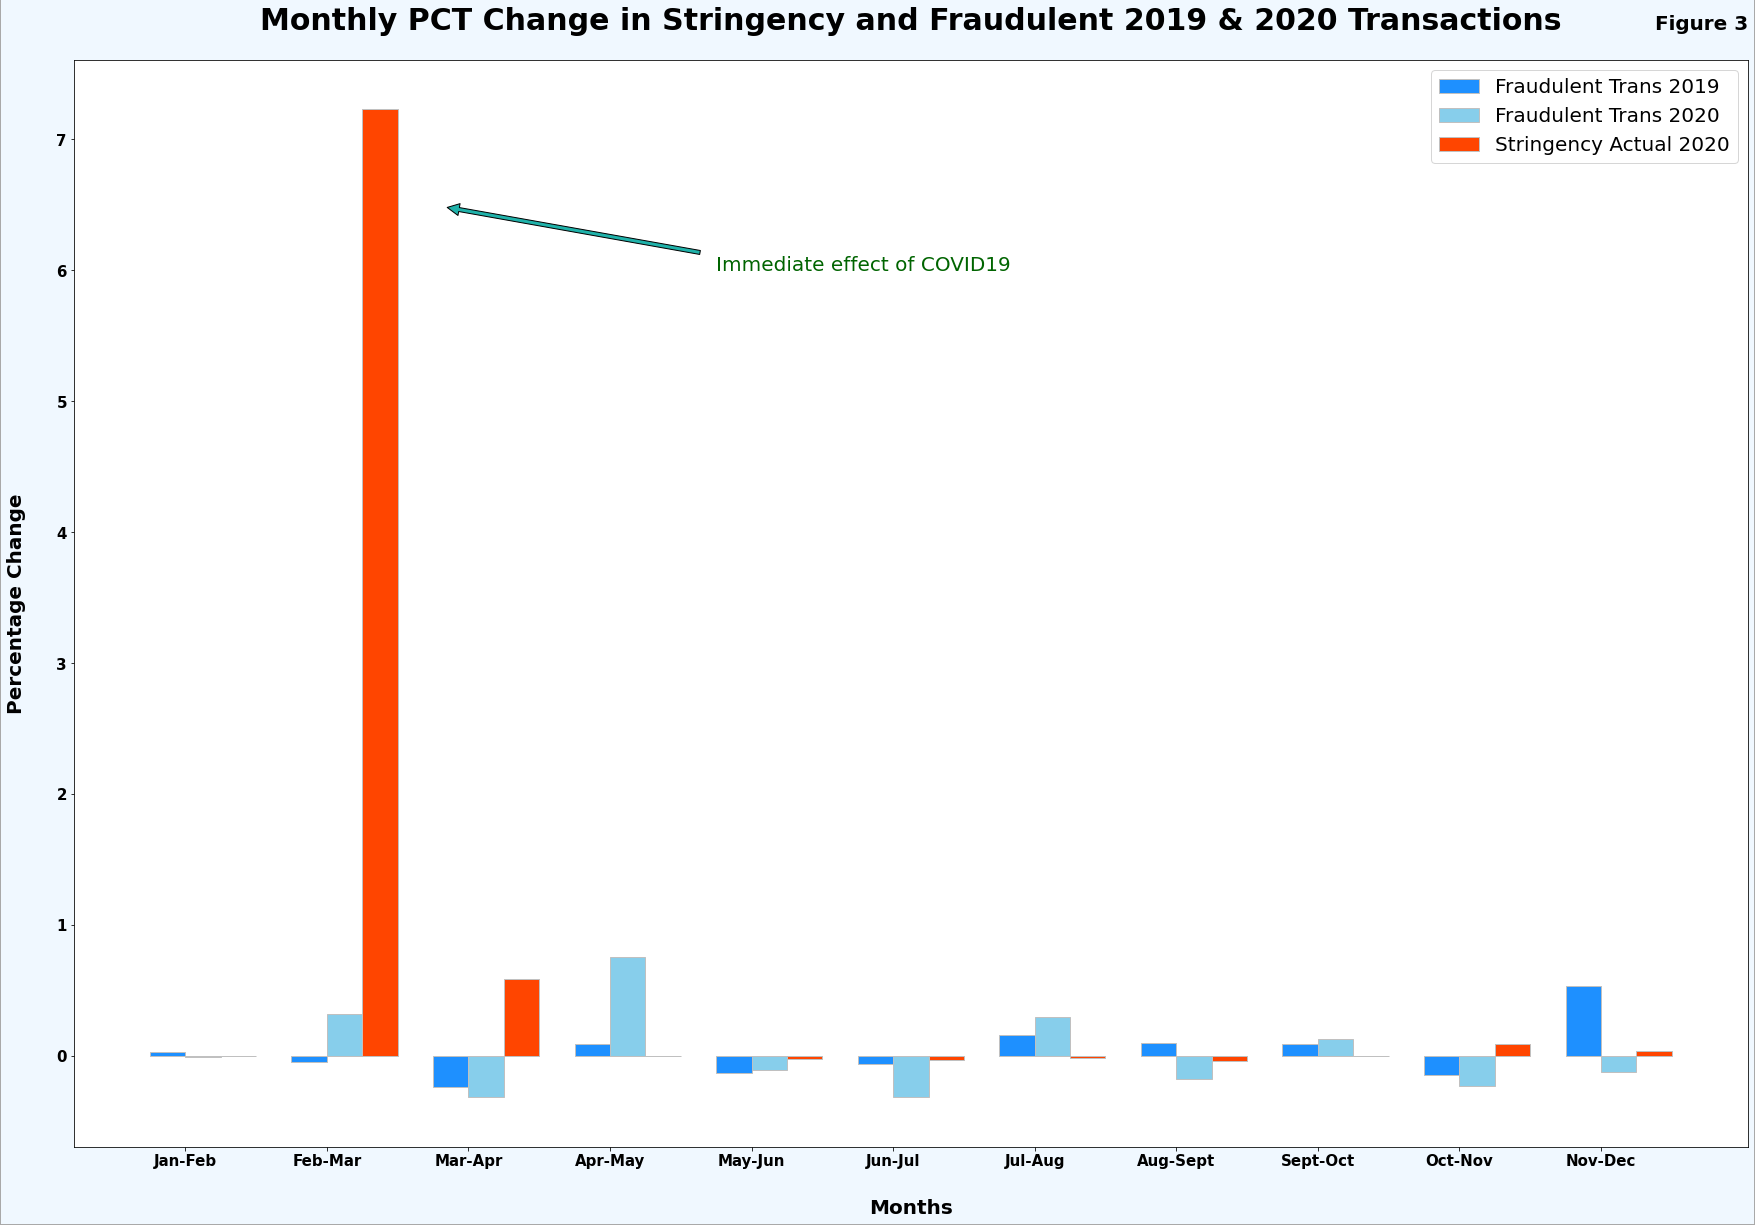

In [75]:
#setting the width of the bar
barWidth = 0.25
covidVtrans_fig = plt.figure(figsize = [30,20],facecolor = 'aliceblue', edgecolor = 'darkgray', linewidth = 2)

#setting the heights of the bar
stringeActualGraph = covidVtransGraphDF2['stringency_actual']
isFraud2019Graph = covidVtransGraphDF2['is_fraud_2019']
isFraud2020Graph= covidVtransGraphDF2['is_fraud_2020']

#setting the position of the bars on X axis
bar1 = np.arange(len(stringeActualGraph))
bar2 = [x + barWidth for x in bar1]
bar3 = [x + barWidth for x in bar2]

#plotting the bars
plt.bar(bar1,
        isFraud2019Graph, 
        color = 'dodgerblue', 
        width = barWidth, 
        edgecolor = 'silver', 
        label = 'Fraudulent Trans 2019',
        align = 'edge')
plt.bar(bar2,
        isFraud2020Graph, 
        color = 'skyblue', 
        width = barWidth, 
        edgecolor = 'silver', 
        label = 'Fraudulent Trans 2020',
        align = 'edge')
plt.bar(bar3,
        stringeActualGraph, 
        color = 'orangered', 
        width = barWidth, 
        edgecolor = 'silver', 
        label = 'Stringency Actual 2020',
        align = 'edge')

#labels, titles & text
plt.title('Monthly PCT Change in Stringency and Fraudulent 2019 & 2020 Transactions', fontsize = 30, fontweight='bold', pad = 30)
plt.title('Figure 3', loc = 'right', fontsize = 20, fontweight='bold', pad = 30)
plt.xlabel('Months', fontsize = 20, fontweight='bold', labelpad = 30)
plt.ylabel('Percentage Change', fontsize = 20, fontweight='bold', labelpad = 30)
plt.xticks([r + barWidth for r in range(len(stringeActualGraph))], 
           ['Jan-Feb', 'Feb-Mar', 'Mar-Apr', 'Apr-May', 'May-Jun', 'Jun-Jul', 'Jul-Aug','Aug-Sept', 'Sept-Oct', 'Oct-Nov','Nov-Dec'],
          fontsize = 15, fontweight='bold')
plt.yticks(fontsize = 15, fontweight='bold')
#annotation for emphasis
plt.annotate('Immediate effect of COVID19', xy=(2, 6.5), xytext=(4, 6), fontsize = 20, color = 'darkgreen',
            arrowprops=dict(facecolor='lightseagreen', shrink=0.05))

plt.legend(fontsize = 20)
plt.show()

In Figure 3 we are able to see a major spike in stringency percentage change for the months of February to March. We do not see this same effect for fraudulent transactions in 2020 as one would expect with everyone being indoors. This could be due to the dataset being simulated and not real-world data. 
From what we can infer from the datasets, there is no correlation at all between fraudulent transactions and the impact of stringency on the USA. 

### Now for the line graph 


This is to see whether it depicts the values better

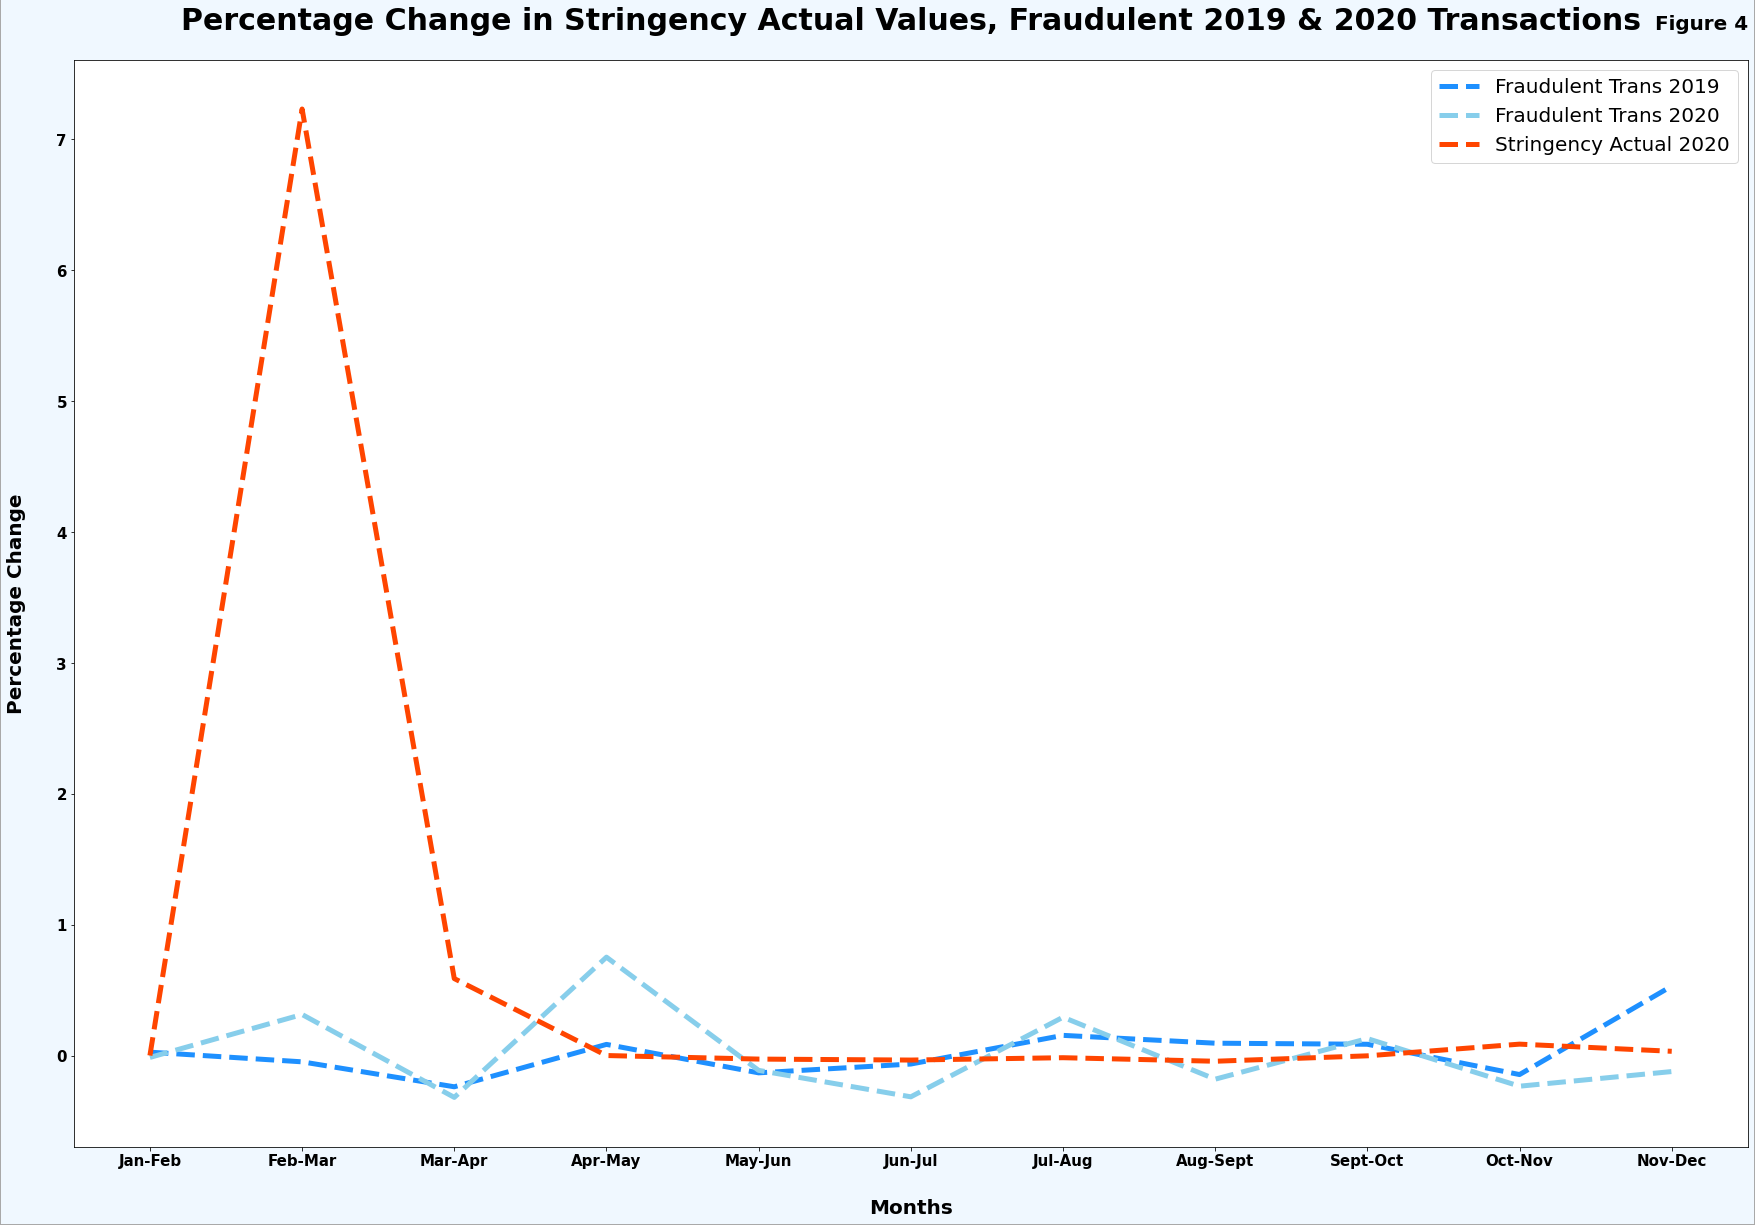

In [76]:
#Setting the y values
stringeActualGraph = covidVtransGraphDF2['stringency_actual']
isFraud2019Graph = covidVtransGraphDF2['is_fraud_2019']
isFraud2020Graph = covidVtransGraphDF2['is_fraud_2020']

#setting the x values
pcDates = covidVtransGraphDF2['Month']

#figure settings
fig_stringeTransPC = plt.figure(figsize= [30, 20], facecolor = 'aliceblue', edgecolor = 'darkgray', linewidth = 2) 

#plotting the lines
plt.plot(pcDates, 
         isFraud2019Graph, 
         linestyle = 'dashed', 
         linewidth = 5,
         color = 'dodgerblue', 
         label = 'Fraudulent Trans 2019')
plt.plot(pcDates, 
         isFraud2020Graph, 
         linestyle = 'dashed', 
         linewidth = 5,
         color = 'skyblue', 
         label = 'Fraudulent Trans 2020')
plt.plot(pcDates, 
         stringeActualGraph, 
         linestyle = 'dashed', 
         linewidth = 5,
         color = 'orangered', 
         label = 'Stringency Actual 2020')

#labels, titles and texts
plt.title('Percentage Change in Stringency Actual Values, Fraudulent 2019 & 2020 Transactions', fontsize = 30, fontweight='bold', pad = 30)
plt.title('Figure 4', loc = 'right', fontsize = 20, fontweight='bold', pad = 30)
plt.xlabel('Months', fontsize = 20, fontweight='bold', labelpad = 30)
plt.ylabel('Percentage Change', fontsize = 20, fontweight='bold', labelpad = 30)
plt.xticks([2,3,4,5,6,7,8,9,10, 11, 12], 
           ['Jan-Feb', 'Feb-Mar', 'Mar-Apr', 'Apr-May', 'May-Jun', 'Jun-Jul', 'Jul-Aug','Aug-Sept', 'Sept-Oct', 'Oct-Nov','Nov-Dec'],
           fontsize = 15, fontweight='bold')
plt.yticks(fontsize = 15, fontweight='bold')

plt.legend(fontsize = 20)
plt.show()

Figure 4 depicts the same lack of correlation between transactions and stringency. This visualisation was created to highlight this in a more effective way. It is from creating multiple graphs which we are able to determine which would best depict the information the data is trying to show us. 